In [1]:
# Importing some basic packages
import pandas as pd

In [3]:
from geoxts.data_processing_functions import *

In [2]:
#We first create downsample the gamma rays to per feet.
df_log = pd.read_parquet('data/hackathon_training_data/data/Training/logs.parquet', engine='fastparquet')
#df_log = df_log.set_index('wellName')
df_log.loc[df_log['GR'] < -1, 'GR' ] = -1
df_log.head()

,wellName,DEPTH,GR
1,512320698.0,421.0,96.9752
2,512320698.0,421.5,102.3324
3,512320698.0,422.0,104.6432
4,512320698.0,422.5,99.2187
5,512320698.0,423.0,92.0200


In [4]:
df_tops = pd.read_parquet('data/hackathon_training_data/data/Training/tops.parquet', engine='fastparquet')
cols = ['MARCEL', 'SYLVAIN', 'CONRAD']
df_tops = df_tops[cols]
df_tops.dropna(inplace = True)
df_tops.head()

,MARCEL,SYLVAIN,CONRAD
wellName,,,
512320698.0,6398.0,6638.0,6661.0
512320699.0,6407.0,6656.0,6676.0
512320928.0,6520.0,6746.0,6793.0
512320970.0,6544.0,6770.0,6816.0
512320971.0,6510.0,6742.0,6789.0


Progress: 33.333333333333336 %
Progress: 66.66666666666667 %
Progress: 100.0 %


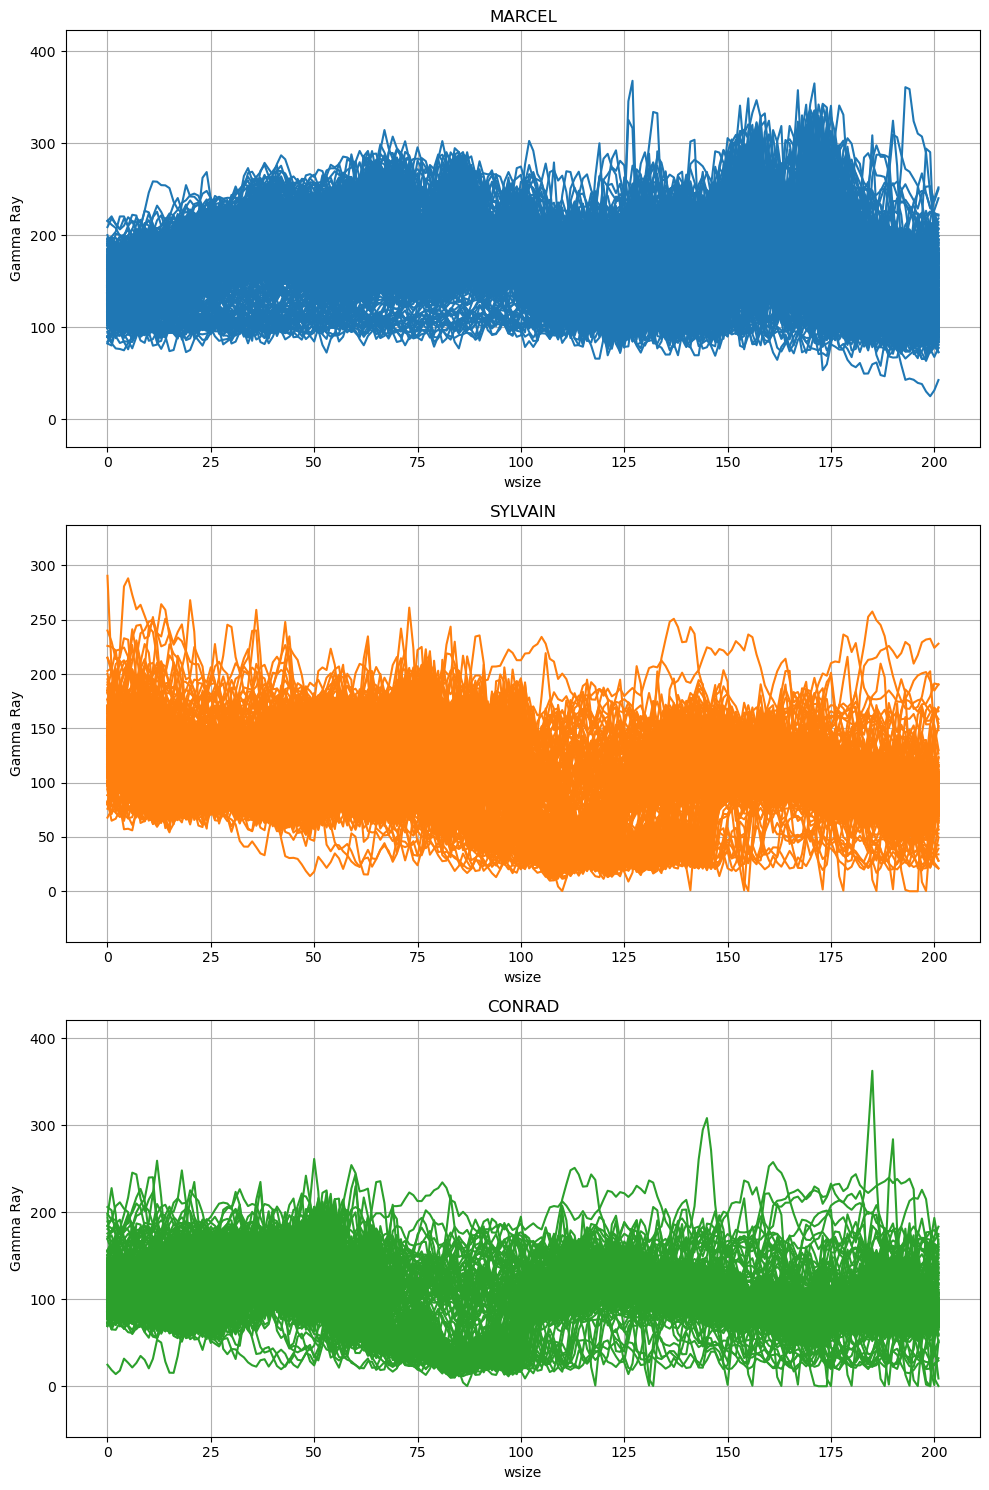

In [5]:
# Define a window size of the signature
wsize = 100
top_list = ['MARCEL', 'SYLVAIN', 'CONRAD']
features_np, labels_np, well_np = plot_and_extract_pattern_local(df_log, df_tops,  top_list, wsize)

Computing distance matrix for MARCEL...
Progress: 40 %
Progress: 80 %
Computing clusters for MARCEL...
Cluster -1 with  297 elements
Cluster 0 with  11 elements
Cluster 1 with  18 elements
Cluster 2 with  43 elements
Cluster 3 with  161 elements
Cluster 4 with  6 elements
Computing distance matrix for SYLVAIN...
Progress: 40 %
Progress: 80 %
Computing clusters for SYLVAIN...
Cluster -1 with  271 elements
Cluster 0 with  13 elements
Cluster 1 with  14 elements
Cluster 2 with  199 elements
Cluster 3 with  23 elements
Cluster 4 with  6 elements
Cluster 5 with  10 elements
Computing distance matrix for CONRAD...
Progress: 40 %
Progress: 80 %
Computing clusters for CONRAD...
Cluster -1 with  407 elements
Cluster 0 with  7 elements
Cluster 1 with  14 elements
Cluster 2 with  13 elements
Cluster 3 with  10 elements
Cluster 4 with  49 elements
Cluster 5 with  36 elements


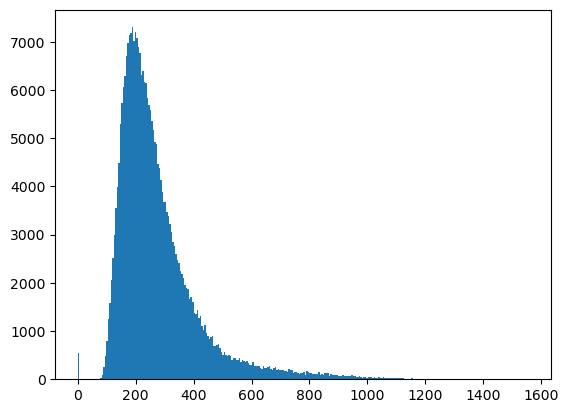

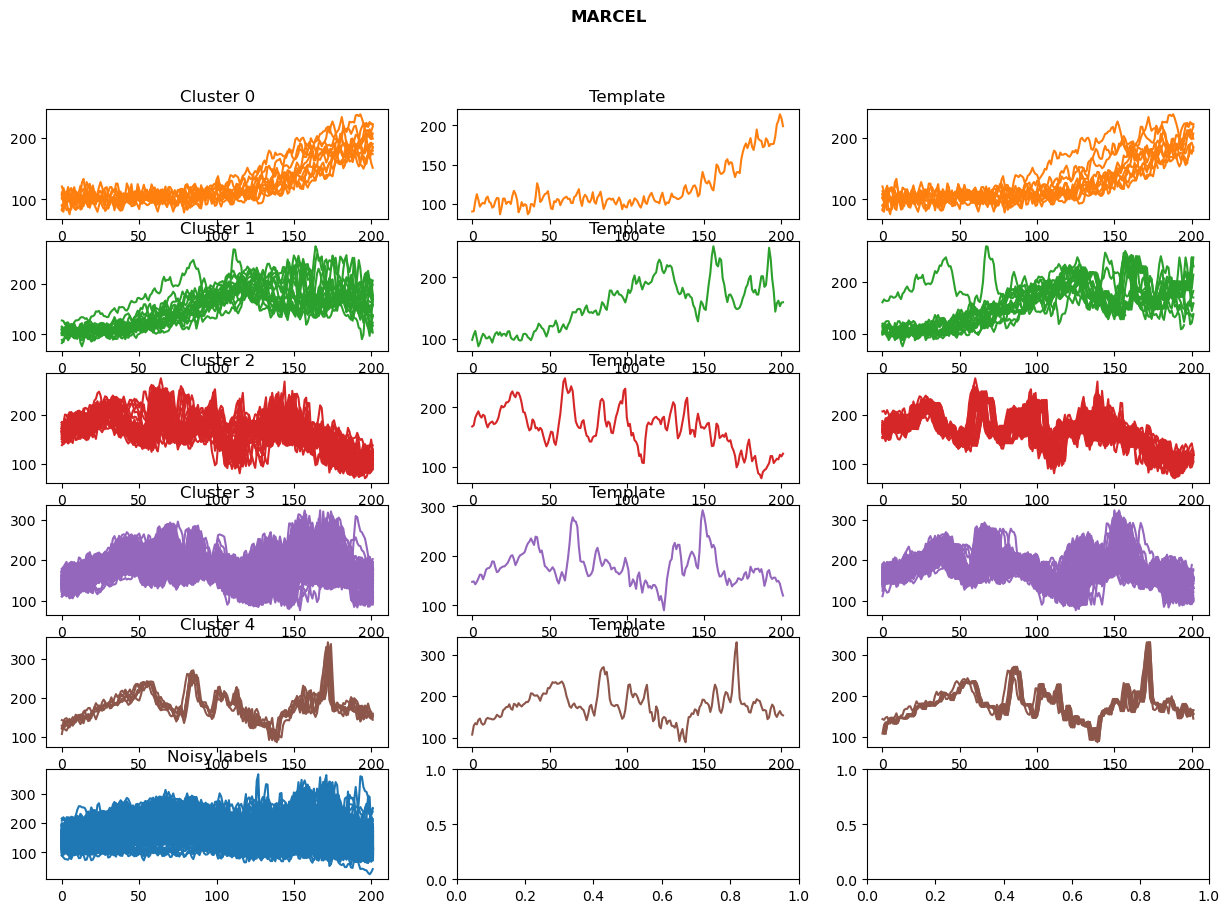

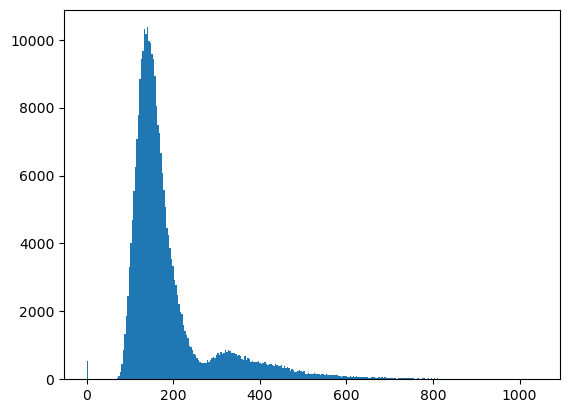

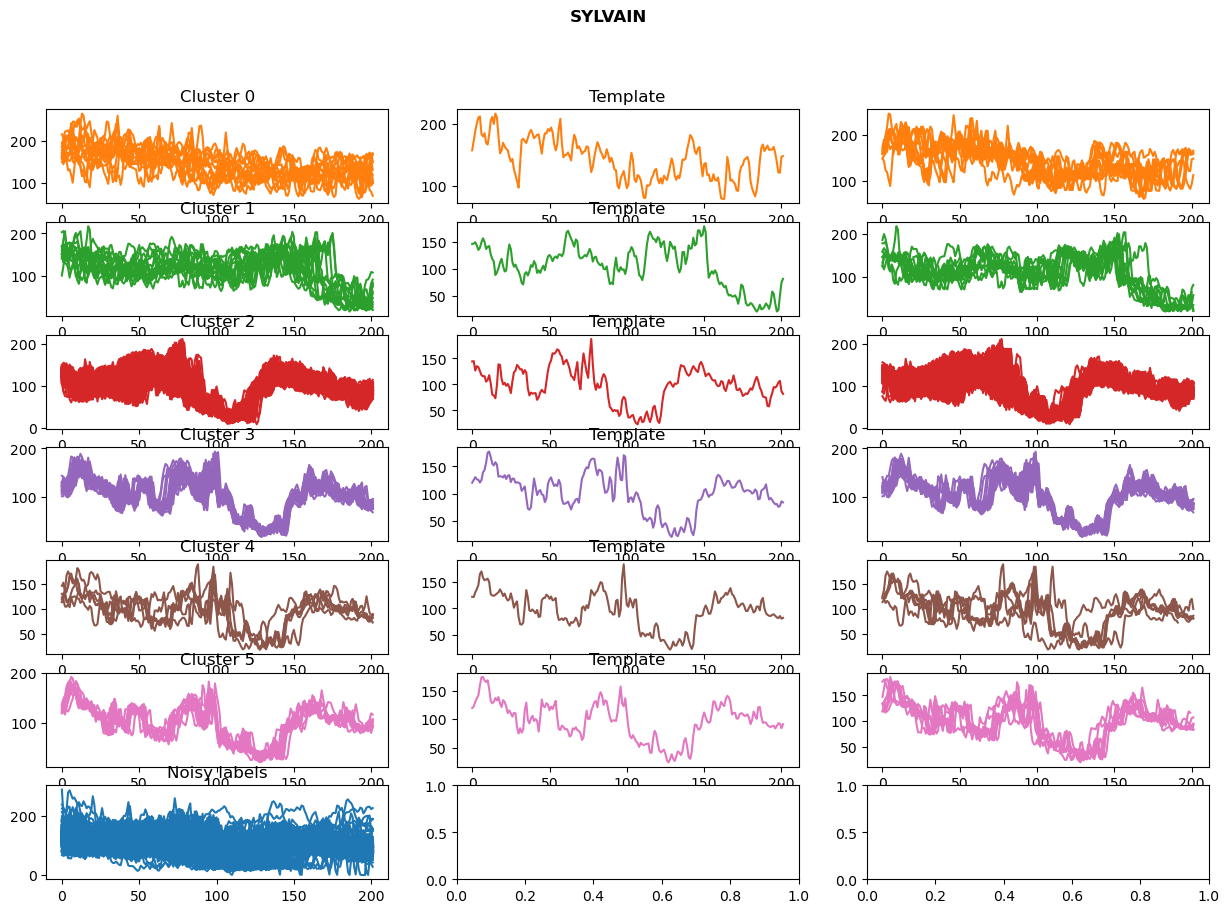

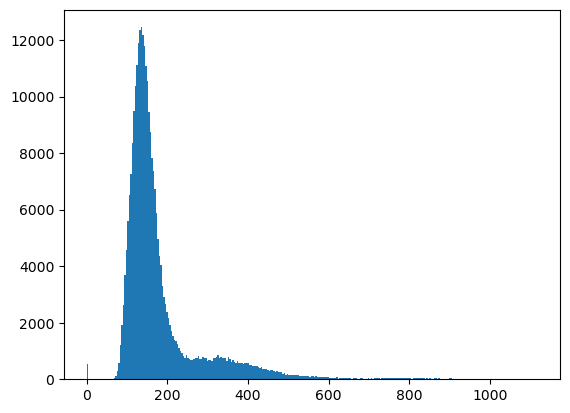

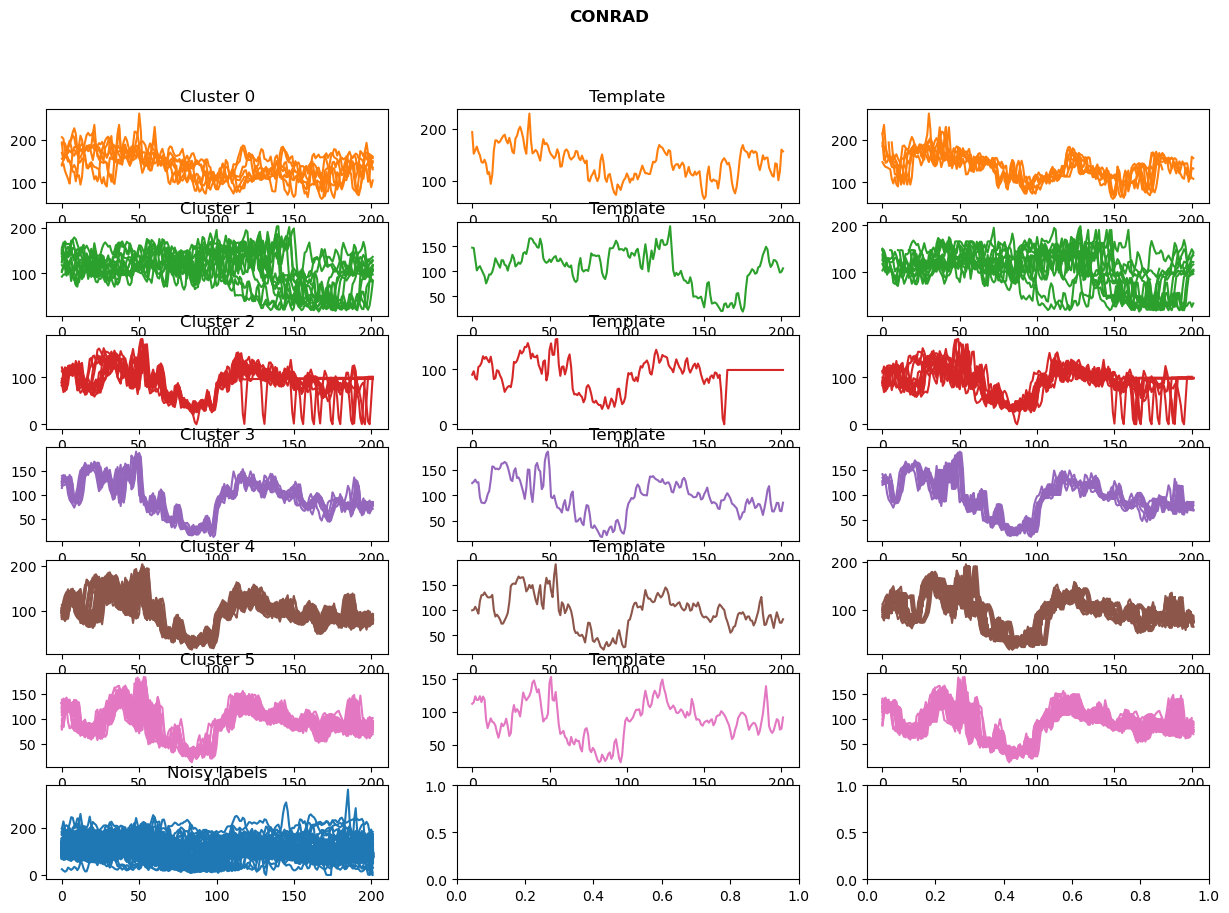

In [6]:
distance_matrix_per_top, template_list_per_top, cluster_list_per_top, cluster_well_list_per_top = cluster_dtw_distance_hdbscan(features_np, labels_np, well_np, top_list, 200)

In [7]:
template_ids_list, training_well_list = training_well(top_list, cluster_well_list_per_top, best_template=False)

MARCEL
The clusters taken for this top are  3 2
SYLVAIN
The clusters taken for this top are  2 3
CONRAD
The clusters taken for this top are  4 5


c:\Users\SSalimath\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\SSalimath\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\SSalimath\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\SSalimath\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'

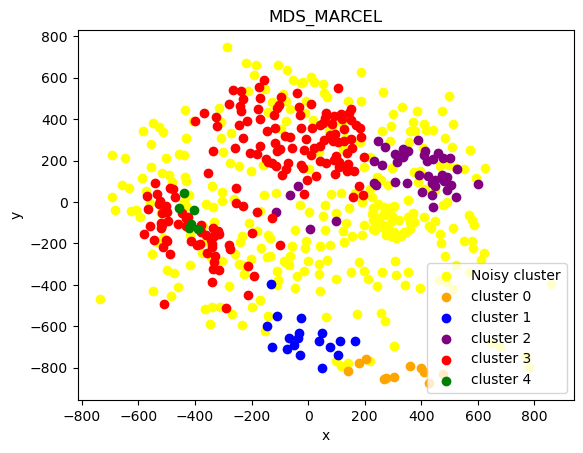

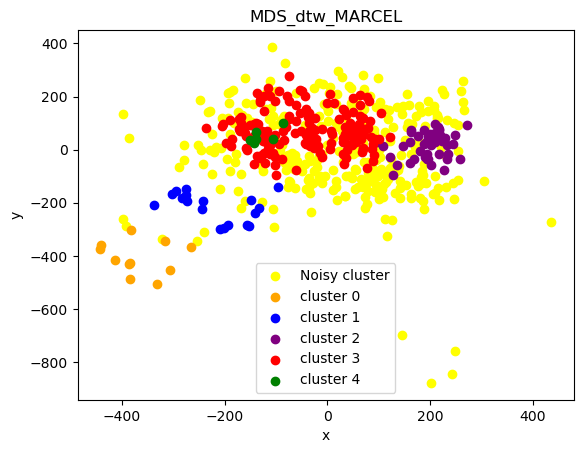

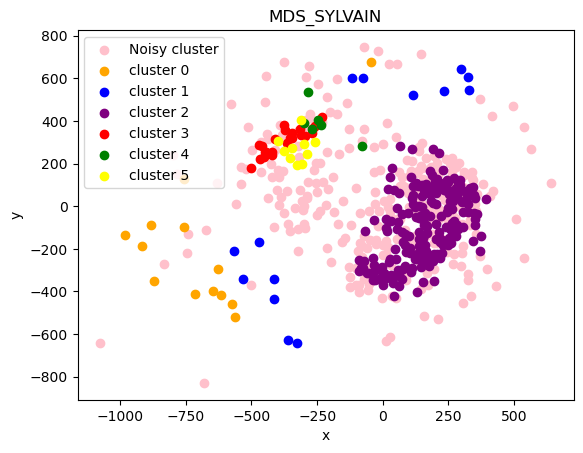

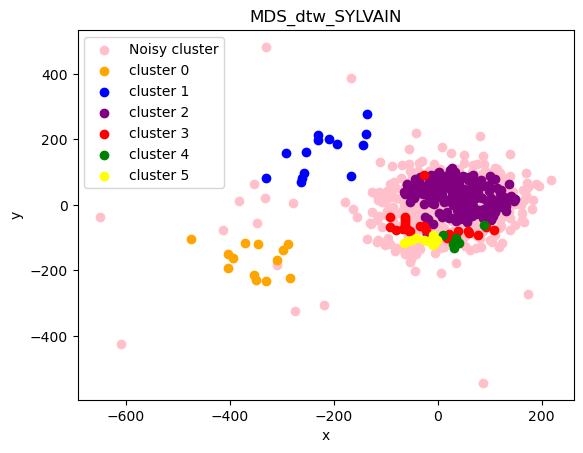

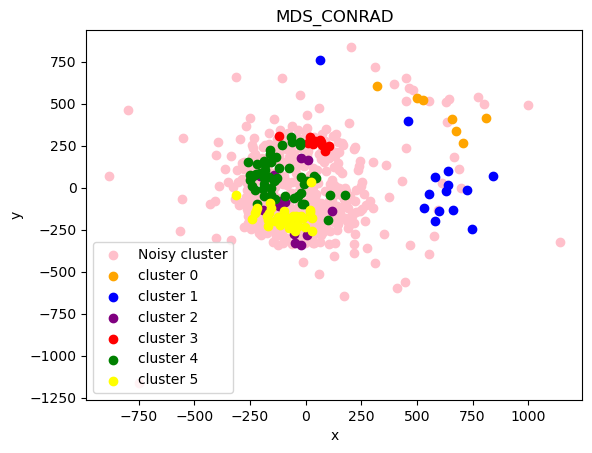

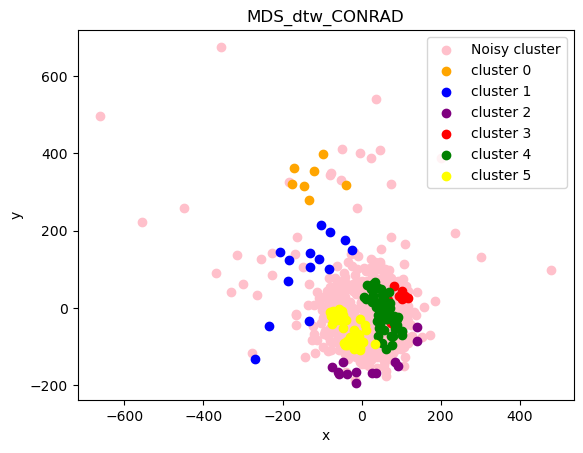

In [8]:
MDS_dtw(top_list, labels_np, features_np, cluster_list_per_top)